In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.data.csv')

## EDA

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280130,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701888,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# housing['CHAS'].value_counts()

# housing['CHAS']

# housing['CHAS'][501]

# housing['CHAS'][[501,502]]

# housing[['CHAS', 'CRIM']]

# housing[['CHAS', 'CRIM']].loc[[501,502]]

# housing.hist(bins=50, figsize=(15, 10));

## Train-test Splitting

In [7]:
# def train_test_split(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
    
#     print(f'shuffled[0]: {shuffled[0]}')
    
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
# train_set, test_set = train_test_split(housing, 0.2)

# print(f'train_set: {len(train_set)}\ntest_set: {len(test_set)}')

In [9]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# print(f'train_set: {len(train_set)}\ntest_set: {len(test_set)}')

### StratifiedShuffleSplit

The StratifiedShuffleSplit class performs stratified random sampling, which means that it ensures that the proportion of different categories in the target variable is preserved in the training and test sets. In this case, the target variable is CHAS, which is a binary variable indicating whether the property is located on the Charles River (1) or not (0).

In [10]:
def tt_split():
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_indices, test_indices in split.split(housing, housing['CHAS']):
        strat_train_set = housing.loc[train_indices]
        strat_test_set = housing.loc[test_indices]
        
    print(f'strat_train_set: {len(strat_train_set)}\nstrat_test_set: {len(strat_test_set)}')
    
    return strat_train_set, strat_test_set

In [11]:
# strat_train_set, strat_test_set = tt_split()

In [12]:
# strat_train_set.info()

# strat_train_set['CHAS'].value_counts()

# strat_test_set['CHAS'].value_counts()

# housing['CHAS'].value_counts()

# print(376/471, 28/35)
# print(95/471, 7/35)

## Looking for Correlations

In [13]:
corr_mat = housing.corr()
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.216740,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.304066,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.386184,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.093596,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.295820,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.216740,0.304066,-0.386184,0.093596,-0.295820,1.000000,-0.235180,0.198815,-0.203795,-0.286652,-0.349952,0.125702,-0.611215,0.692684
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.235180,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.198815,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.203795,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.286652,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
corr_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692684
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [15]:
def strong_corr():
    corr_mat = housing.corr()
    strong_corr = corr_mat['MEDV'].abs().sort_values(ascending=False)
    strong_corr = strong_corr[strong_corr >= .5]
    return corr_mat['MEDV'][strong_corr.index]

In [16]:
strong_corr()

MEDV       1.000000
LSTAT     -0.737663
RM         0.692684
PTRATIO   -0.507787
Name: MEDV, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
def strong_corr_scatter():
    scatter_matrix(housing[strong_corr().index], figsize=(12,8));

def corr_scatter(col):
    housing.plot(kind='scatter', x=col, y='MEDV', alpha=.8)

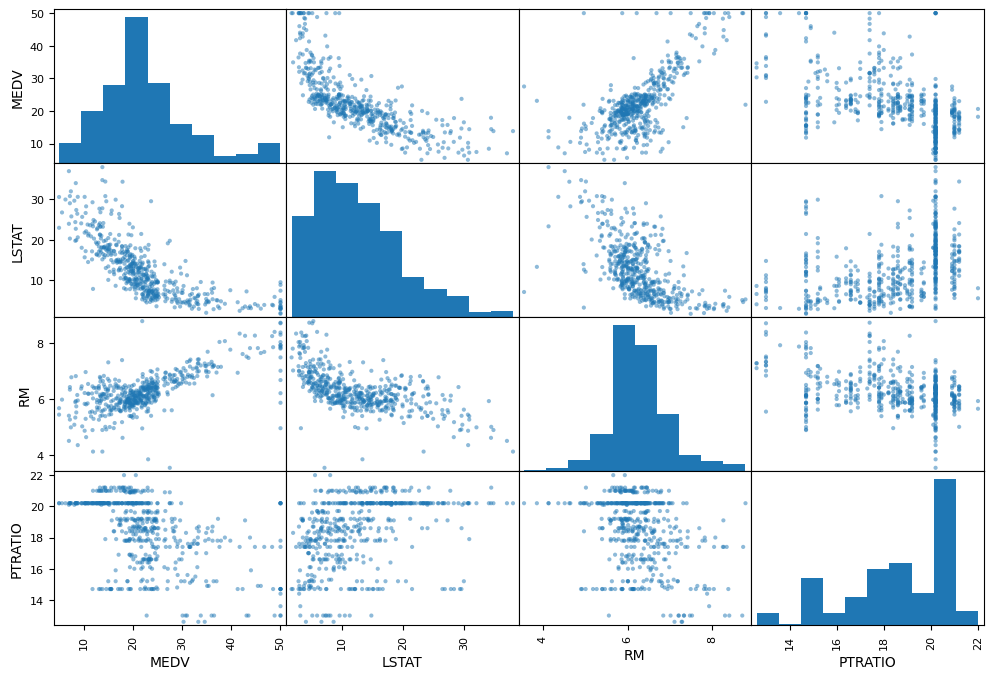

In [19]:
strong_corr_scatter()

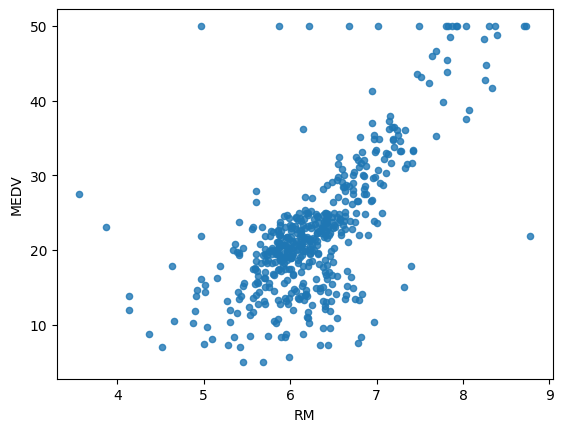

In [20]:
corr_scatter('RM')

## Trying out Attribute combinations

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.061984


In [23]:
strong_corr()

MEDV       1.000000
LSTAT     -0.737663
RM         0.692684
TAXRM     -0.530276
PTRATIO   -0.507787
Name: MEDV, dtype: float64

In [24]:
# strong_corr_scatter()

In [25]:
# corr_scatter('TAXRM')

In [26]:
# Handling missing attributes:
#     1. get rid of missing pts.
#     2. get rid of whole attr.
#     3. set val to 0, mean or med

In [27]:
#     1. get rid of missing pts.
a = housing.dropna(subset=['RM'])
a.shape

(501, 15)

In [28]:
#     2. get rid of whole attr.
a = housing.drop('RM', axis=1)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  TAXRM    501 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [29]:
#     3. set val to 0, mean or med
med = housing['RM'].median() # Store it for later use (to fill missing val(s) in test, prediction sets)
housing['RM'].fillna(med) # Won't affect orig housing df (use inplace=True for hard modification)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

## Impute missing values 

In [30]:
housing_orig = housing
strat_train_set, strat_test_set = tt_split()
housing = strat_train_set

strat_train_set: 404
strat_test_set: 102


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    400 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 50.5 KB


In [32]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277143,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.625547
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713716,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.382576
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.429362
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21000000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.44293624e+01])

In [35]:
X = imputer.transform(housing)
print(X)

[[4.81900000e-02 8.00000000e+01 3.64000000e+00 ... 6.57000000e+00
  2.19000000e+01 5.15717092e+01]
 [1.50100000e-02 8.00000000e+01 2.01000000e+00 ... 5.99000000e+00
  2.45000000e+01 4.22004521e+01]
 [4.87141000e+00 0.00000000e+00 1.81000000e+01 ... 1.86800000e+01
  1.67000000e+01 1.02714374e+02]
 ...
 [8.18700000e-02 0.00000000e+00 2.89000000e+00 ... 3.57000000e+00
  4.38000000e+01 3.52941176e+01]
 [4.75237000e+00 0.00000000e+00 1.81000000e+01 ... 1.81300000e+01
  1.41000000e+01 1.02068966e+02]
 [4.56000000e-02 0.00000000e+00 1.38900000e+01 ... 1.35100000e+01
  2.33000000e+01 4.68750000e+01]]


In [36]:
# X.shape

# type(X)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276478,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.494892
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710197,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.253833
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.168593
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.429362
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.071034
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## Sklearn design

Primarily, three types of objects:

1. Estimators - It estimates some parameter based on a dataset. Eg. Imputer. It has a fit method and transform method. Fit method fits the dataset and calculates internal parameters.

2. Transformaers - Transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also has score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:

1. Min-max scaling (Normalization):

(value - min)/(max - min)

Sklearn provides a class called MinMaxScaler for this

2. Standardization

(value - mean)/std

Sklearn provides a class called StandardScaler for this

## Creating a pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ...
    ('std_scaler', StandardScaler())
])

In [41]:
housing_labels = housing['MEDV'].copy()
housing = housing.drop('MEDV', axis=1)
housing = housing.drop('TAXRM', axis=1) # duh! (^///^)

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [44]:
housing_num_tr.shape

(404, 13)

In [45]:
housing_labels.shape

(404,)

## Selection of desired model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()


model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [68]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23752103, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [48]:
model.predict(prepared_data)

array([22.199, 25.089, 16.523, 23.55 , 23.52 ])

In [49]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

In [51]:
mse = mean_squared_error(housing_predictions, housing_labels)
rmse = np.sqrt(mse)

In [52]:
mse

1.4967560445544552

In [53]:
rmse

1.223419815335053

## Using better evaluation technique - Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([2.89608734, 2.88467811, 4.70517973, 3.08690116, 3.2042378 ,
       2.49517189, 4.17314398, 3.46038353, 3.08251056, 3.38961143])

In [56]:
def print_scores(scores):
    print(f'scores: {scores}')
    print(f'mean: {scores.mean()}')
    print(f'std: {scores.std()}')
    print(f'😎: [{scores.mean() - scores.std()}, {scores.mean() + scores.std()}]')

In [57]:
print_scores(rmse_scores)

scores: [2.89608734 2.88467811 4.70517973 3.08690116 3.2042378  2.49517189
 4.17314398 3.46038353 3.08251056 3.38961143]
mean: 3.3377905538325927
std: 0.6198105753330576
😎: [2.7179799784995353, 3.95760112916565]


## LinearRegression
scores: [4.1586198  4.27871326 5.17991609 3.92930031 5.3692877  4.40149594
 7.45686894 5.52625729 4.14232706 6.05075518]
    
mean: 5.049354157234278
    
std: 1.0502383571588667

😎: [3.9991158000754115, 6.099592514393144]

## DecisionTreeRegressor

scores: [4.10567721 5.28119074 5.40857494 4.53993123 4.32790365 3.68947828
 7.64642073 5.39237888 3.75093322 3.95205643]
 
mean: 4.809454531674119

std: 1.1348762306872051

😎: [3.3446293068224495, 5.800670370841967]

## RandomForestRegressor
scores: [2.84654616 2.938878   4.64470163 2.92694333 3.21405751 2.57130946
 4.65887751 3.38253226 3.04995972 3.37965391]
    
mean: 3.3613459472235983
    
std: 0.6860313802362531

😎: [2.6987448932932576, 4.119098411068847]

## Saving the model

In [60]:
from joblib import dump, load

In [61]:
# dump(model, 'Boston.joblib')

['Boston.joblib']

In [62]:
strat_test_set_Y = strat_test_set['MEDV'].copy()
strat_test_set_X = strat_test_set.drop('MEDV', axis=1)
strat_test_set_X = strat_test_set_X.drop('TAXRM', axis=1) # duh! (^///^)

In [63]:
strat_test_set_X_prepared = my_pipeline.transform(strat_test_set_X)

In [64]:
final_predictions = model.predict(strat_test_set_X_prepared)

In [65]:
final_mse = mean_squared_error(strat_test_set_Y, final_predictions)

In [66]:
final_rmse = np.sqrt(final_mse)

In [67]:
final_rmse

3.194701202696397

## Using the model

In [69]:
model = load('Boston.joblib')

In [71]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23752103, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

In [73]:
model.predict(features)

array([22.199])